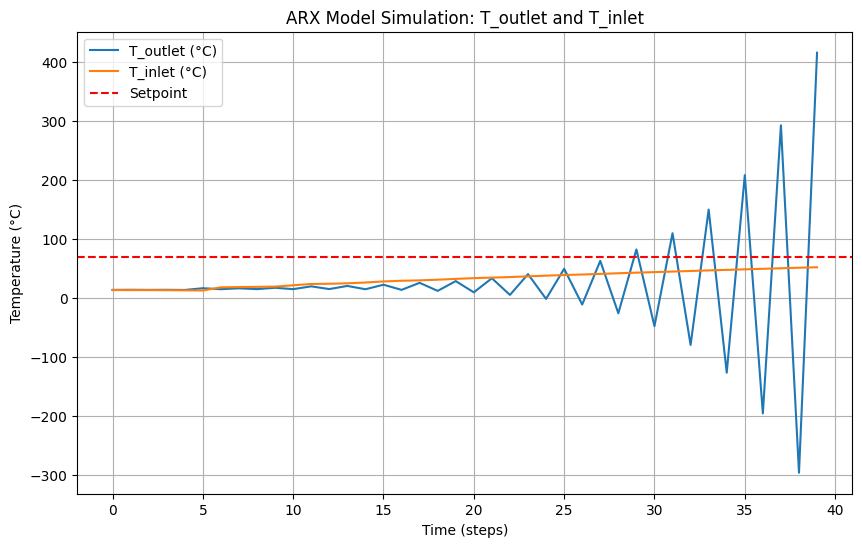

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
MAX_POWER = 33.0e3  # kW
SETPOINT = 70.0     # °C
INIT_TEMP = 14.0    # °C
EPISODE_LENGTH = 40 

# ARX coefficients for T_outlet and T_inlet
coef_out = np.array([0.8632, -0.4192, 0.2132, -0.04142, 0.4019, -0.04193])
b_out = 0.0002702
coef_in = np.array([-0.05127, 0.1027, 0.0718, 0.1142, 0.3956, 0.3208])
b_in = 0.00055

# Initialize histories
tout_hist = INIT_TEMP * np.ones(6)
tin_hist = INIT_TEMP * np.ones(6)
u_hist = np.zeros(6)

# Storage for plotting
tout_data = []
tin_data = []
time_data = []

# Simulation loop
for t in range(EPISODE_LENGTH):
    # Random action (input power)
    u_t = 10e3

    # Update histories
    tout_hist = np.roll(tout_hist, 1)
    tin_hist = np.roll(tin_hist, 1)
    u_hist = np.roll(u_hist, 1)

    # Compute new T_outlet and T_inlet
    new_tout = np.sum(coef_out * tout_hist) + b_out * u_hist[5]
    new_tin = np.sum(coef_in * tin_hist) + b_in * u_hist[0]

    # Add small noise
    new_tout += 0.01 * np.random.randn()
    new_tin += 0.01 * np.random.randn()

    # Update histories
    tout_hist[0] = new_tout
    tin_hist[0] = new_tin
    u_hist[0] = u_t

    # Store data for plotting
    tout_data.append(new_tout)
    tin_data.append(new_tin)
    time_data.append(t)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(time_data, tout_data, label='T_outlet (°C)')
plt.plot(time_data, tin_data, label='T_inlet (°C)')
plt.axhline(y=SETPOINT, color='r', linestyle='--', label='Setpoint')
plt.xlabel('Time (steps)')
plt.ylabel('Temperature (°C)')
plt.title('ARX Model Simulation: T_outlet and T_inlet')
plt.legend()
plt.grid()
plt.show()
